# **DATA ANALYTICS PROJECT**

# **TIME SERIES ANALYSIS AND FORECASTING FOR STOCK MARKET**

Explore various time series models to understand historical patterns, identify trends and
seasonality, and make short-term or long-term predictions.

# **Collect and preprocess historical stock market data.**

In [ ]:
# General-purpose libraries

import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Advanced visualizations

# Machine Learning and Deep Learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Data normalization/scaling
import tensorflow as tf  # Deep learning framework

# System utilities and warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for a clean output

In [ ]:
# Importing Data
data = pd.read_csv("/content/stock_data.csv")
data

,Date,Open,High,Low,Close,Volume,Name
0,01-03-2006,39.69,41.22,38.79,40.91,24232729,AABA
1,01-04-2006,41.22,41.90,40.77,40.97,20553479,AABA
2,01-05-2006,40.93,41.73,40.85,41.53,12829610,AABA
3,01-06-2006,42.88,43.57,42.80,43.21,29422828,AABA
4,01-09-2006,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA


In [ ]:
data.info()  #dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [ ]:
data.describe()  #statisics of data

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,28.426479,28.766532,28.066558,28.412726,2.158391e+07
std,13.257242,13.356692,13.157326,13.258163,1.926231e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.175000,16.385000,15.970000,16.130000,1.248025e+07
50%,27.180000,27.490000,26.820000,27.100000,1.732130e+07
75%,36.655000,37.035000,36.305000,36.635000,2.512757e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,01-03-2006,39.69,41.22,38.79,40.91,24232729,AABA
1,01-04-2006,41.22,41.90,40.77,40.97,20553479,AABA
2,01-05-2006,40.93,41.73,40.85,41.53,12829610,AABA
3,01-06-2006,42.88,43.57,42.80,43.21,29422828,AABA
4,01-09-2006,43.10,43.66,42.82,43.42,16268338,AABA


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Volume,Name
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA
3018,12/29/2017,69.79,70.13,69.43,69.85,6613070,AABA


In [ ]:
data.duplicated().sum()  #sum of duplicated value

np.int64(0)

In [ ]:
data.isna().sum() #sum of null values

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


# **Outlier Detection**

In [ ]:
import seaborn as sns
data['Date']=pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date',inplace=True)


<Axes: ylabel='Close'>

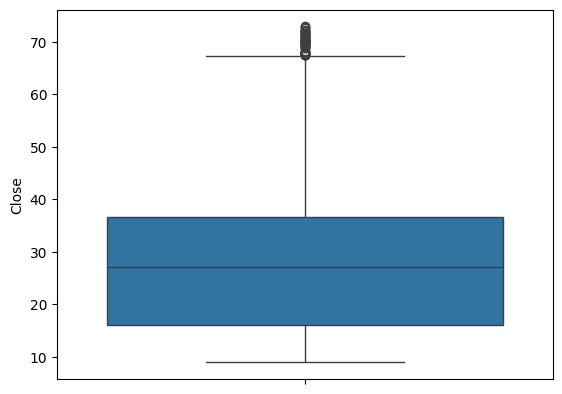

In [ ]:
# boxplot
df=data
sns.boxplot(df['Close'])

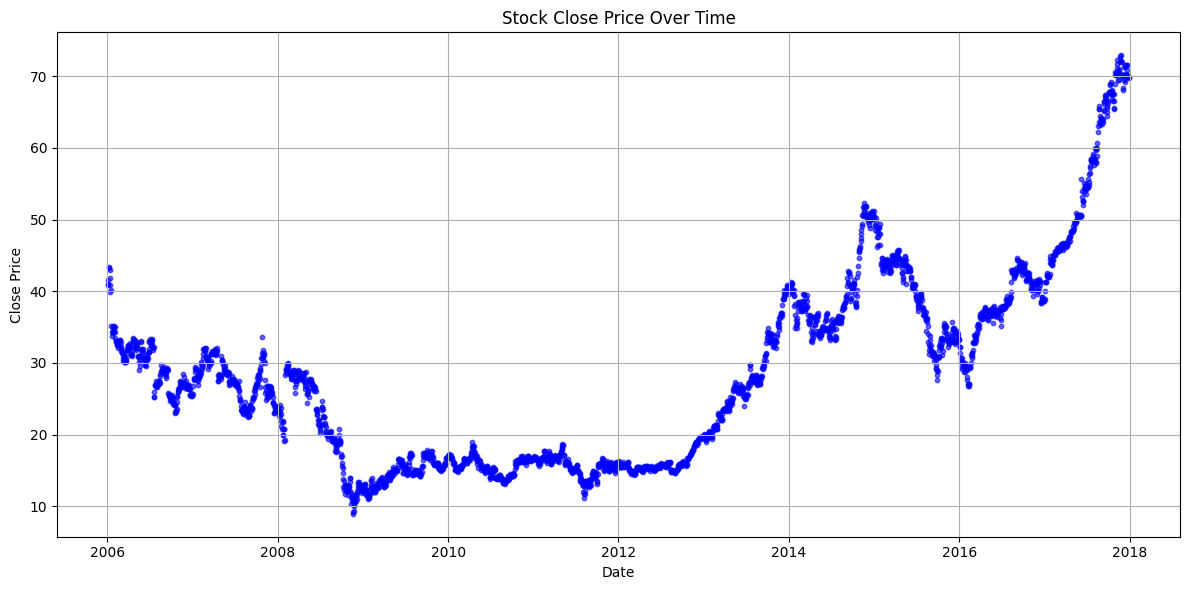

In [ ]:
# scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Close'],alpha=0.6, s=10,color='blue')
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Analyse time series concepts**

**Trend:**
The long-term movement or direction in the data over time.

**Seasonality:**Displays recurring patterns or cycles within each year (monthly).

**Residual (Noise):**What’s left after removing trend and seasonality.

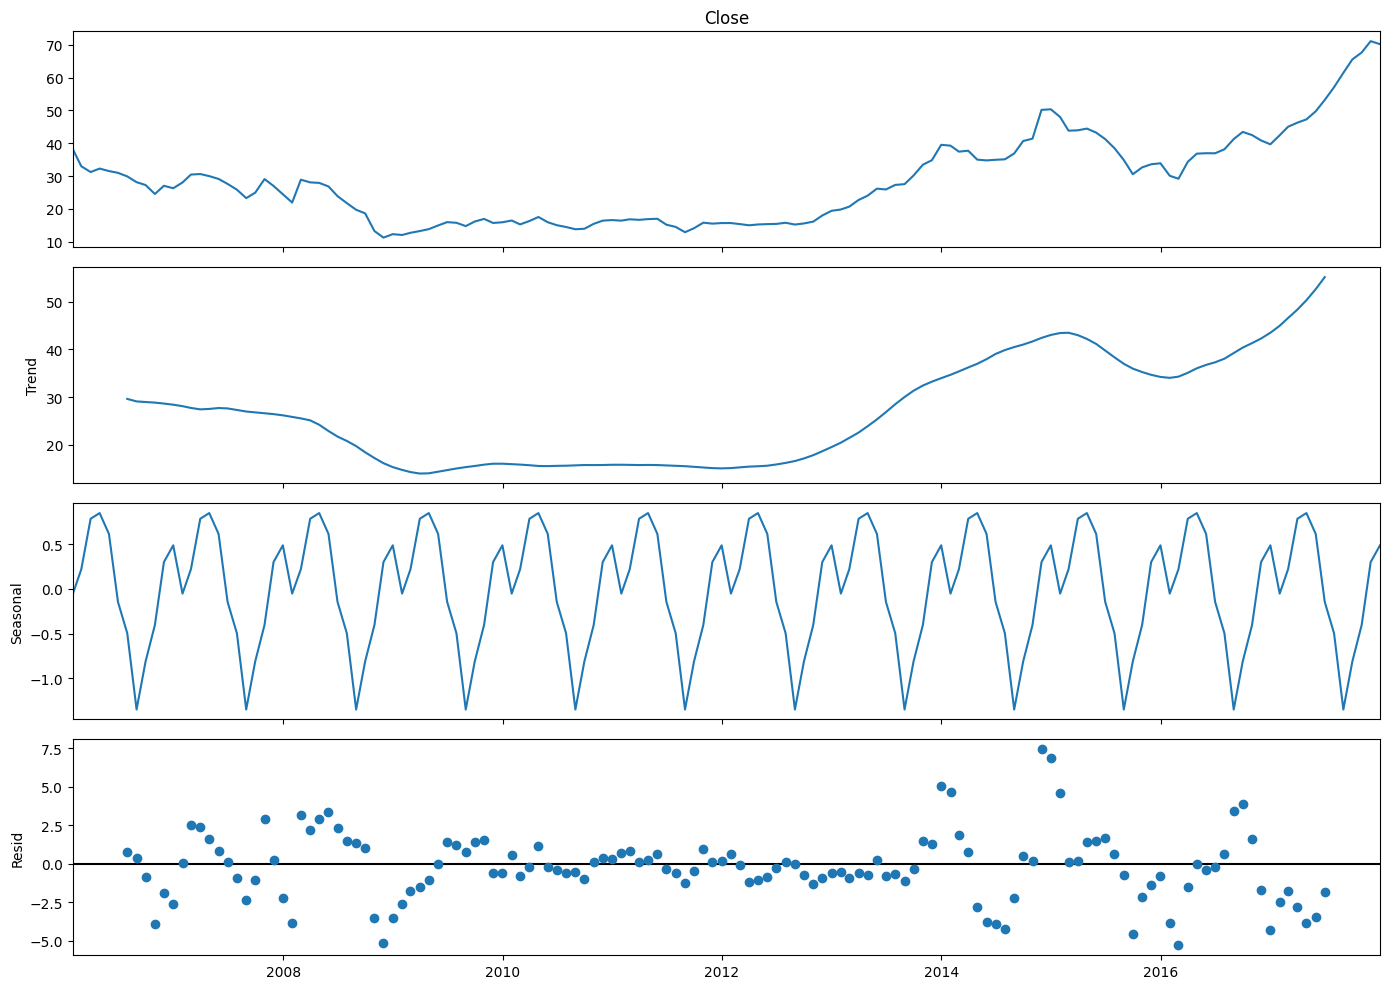

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df=data
df

# Resample to monthly average closing price
monthly_close = df['Close'].resample('M').mean()

# Apply seasonal decomposition (additive model)
decomposition = seasonal_decompose(monthly_close, model='additive')

# Plot the decomposition results
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.tight_layout()
plt.show()


# **Forecasting**

**Prophet** **Forecasting**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqfy2_bm/mdvxw5cs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqfy2_bm/2vi4b0qr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94203', 'data', 'file=/tmp/tmphqfy2_bm/mdvxw5cs.json', 'init=/tmp/tmphqfy2_bm/2vi4b0qr.json', 'output', 'file=/tmp/tmphqfy2_bm/prophet_modelpj3qalnl/prophet_model-20250526100036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:00:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:00:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


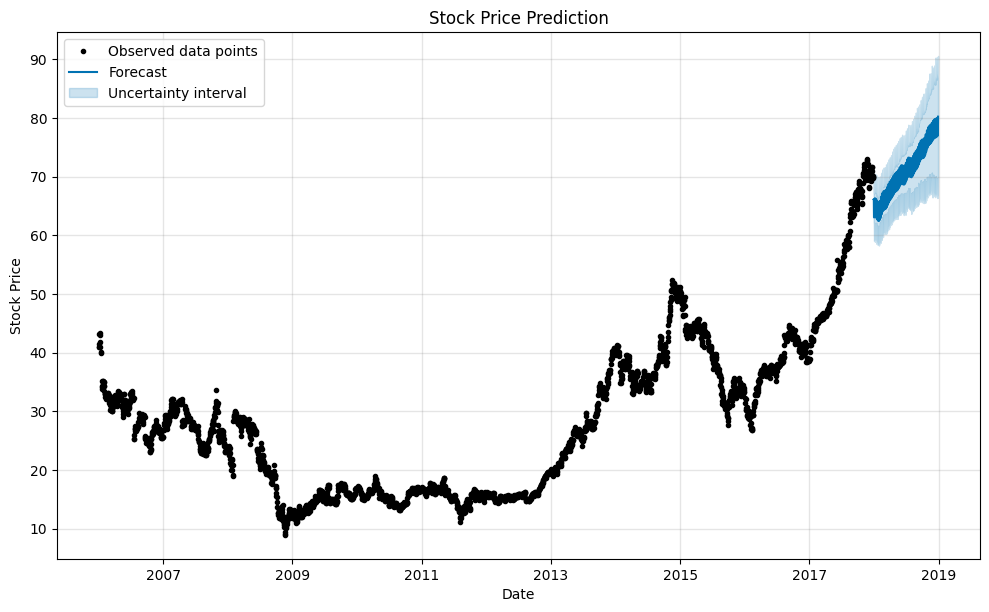

In [ ]:
#Facebook prophet forecasting

from prophet import Prophet
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt # Plotting



#Fetch the data
data=pd.read_csv('/content/stock_data.csv')
data['Date']=pd.to_datetime(data['Date'],format='mixed')

# data.sort_values(by='Date',inplace=True)

# set Date as index column
data.set_index('Date',inplace=True)

# reset index and rename columns
df=data.reset_index()[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})

# model creation
model=Prophet()
model.fit(df)

# future prediction
future=model.make_future_dataframe(periods=365,include_history=False)

# Prediction
prediction=model.predict(future)

# plot prediction
model.plot(prediction)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-30,63.313356,62.215591,70.292412,63.313356,63.313356,2.806655,2.806655,2.806655,2.244236,2.244236,2.244236,0.562419,0.562419,0.562419,0.0,0.0,0.0,66.120011
1,2017-12-31,63.352079,62.199376,70.036510,63.352079,63.352079,2.805149,2.805149,2.805149,2.244238,2.244238,2.244238,0.560911,0.560911,0.560911,0.0,0.0,0.0,66.157228
2,2018-01-01,63.390802,59.046521,67.219149,63.390802,63.390802,-0.343197,-0.343197,-0.343197,-0.900249,-0.900249,-0.900249,0.557051,0.557051,0.557051,0.0,0.0,0.0,63.047604
3,2018-01-02,63.429524,59.160026,67.106768,63.429524,63.429524,-0.348102,-0.348102,-0.348102,-0.898056,-0.898056,-0.898056,0.549954,0.549954,0.549954,0.0,0.0,0.0,63.081422
4,2018-01-03,63.468247,58.982353,67.200217,63.468247,63.468247,-0.391916,-0.391916,-0.391916,-0.930675,-0.930675,-0.930675,0.538759,0.538759,0.538759,0.0,0.0,0.0,63.076331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-25,77.253501,66.343768,87.637526,67.537570,86.757829,-0.333220,-0.333220,-0.333220,-0.898056,-0.898056,-0.898056,0.564836,0.564836,0.564836,0.0,0.0,0.0,76.920281
361,2018-12-26,77.292224,66.699226,87.189013,67.544894,86.833070,-0.368350,-0.368350,-0.368350,-0.930675,-0.930675,-0.930675,0.562325,0.562325,0.562325,0.0,0.0,0.0,76.923873
362,2018-12-27,77.330946,66.893285,86.787827,67.545144,86.905676,-0.347882,-0.347882,-0.347882,-0.909371,-0.909371,-0.909371,0.561489,0.561489,0.561489,0.0,0.0,0.0,76.983064
363,2018-12-28,77.369669,66.383395,87.447518,67.522628,86.968537,-0.288395,-0.288395,-0.288395,-0.850122,-0.850122,-0.850122,0.561727,0.561727,0.561727,0.0,0.0,0.0,77.081274


**ARIMA Forecating**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


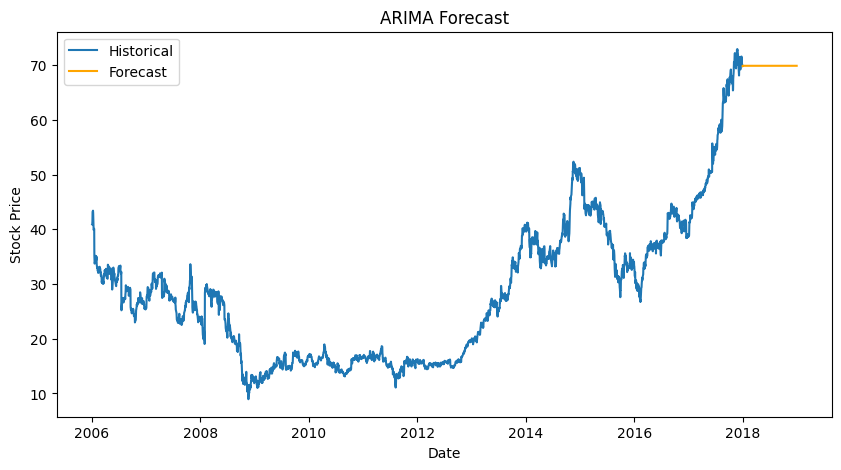

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare data
data = pd.read_csv('/content/stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date', inplace=True)
series = data['Close']

# Fit ARIMA model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 365 days
forecast = model_fit.forecast(steps=365)


# Plot original and forecast
plt.figure(figsize=(10, 5))
plt.plot(series, label='Historical')
plt.plot(pd.date_range(series.index[-1], periods=365, freq='D'),forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
forecast

,predicted_mean
3019,69.863157
3020,69.904376
3021,69.900914
3022,69.904722
3023,69.902529
...,...
3379,69.901236
3380,69.901236
3381,69.901236
3382,69.901236


SARIMA Forecasting

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


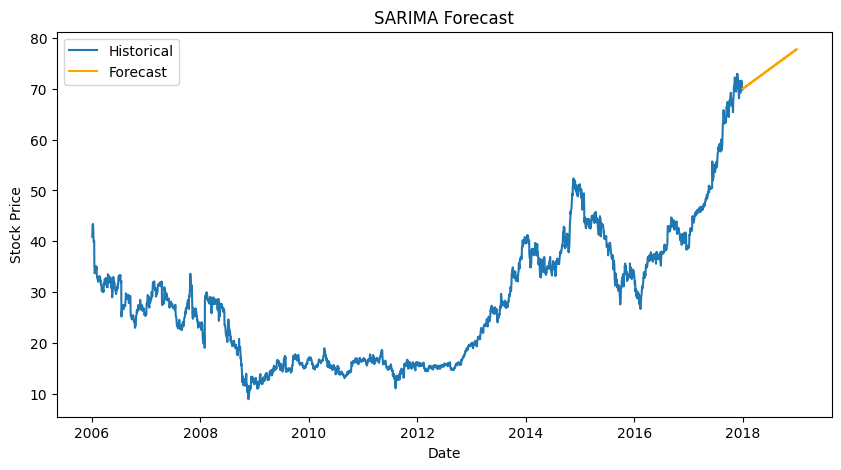

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare time series
data = pd.read_csv('/content/stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date', inplace=True)

# Select the target column
series = data['Close']

# Fit SARIMA model
model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast next 365 steps
forecast = model_fit.forecast(steps=365)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(series, label='Historical')
plt.plot(pd.date_range(series.index[-1], periods=365, freq='D'), forecast, label='Forecast', color='orange')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Predict future stock prices using LSTM

In [ ]:
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler # Data normalization/scaling
from tensorflow.keras.models import Sequential # Deep learning framework
from tensorflow.keras.layers import LSTM, Dense


Load Stock Data

In [ ]:
# Load and prepare data
data = pd.read_csv('/content/stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date', inplace=True)
df = data[['Close']]




Normalize and Prepare Data

In [ ]:
# Convert to numpy array
data_values = df['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_values)

# Create sequences of 60 time steps
X, y = [], []
seq_len = 60

for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i - seq_len:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)


# Reshape for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
scaled_data

array([[0.4995311 ],
       [0.5004689 ],
       [0.50922163],
       ...,
       [0.95514223],
       [0.95139106],
       [0.95185996]])

Build LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_len, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')

 Train the Model

In [ ]:
history=model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0220
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8720e-04
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9353e-04
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1979e-04
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6736e-04
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4576e-04
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4476e-04
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.1366e-04
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.6111e-04
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.7535e-04


In [ ]:
history.history

{'loss': [0.0067799086682498455,
  0.00047543580876663327,
  0.0004266190226189792,
  0.0003957550216000527,
  0.0003896986600011587,
  0.0003399083507247269,
  0.0003293125191703439,
  0.00031705229775980115,
  0.0003381291462574154,
  0.0002960166893899441]}

Forecast the Next 365 Days

In [ ]:
# Start from last available sequence
forecast_input = scaled_data[-seq_len:]
forecast = []

for _ in range(365):
    input_reshaped = forecast_input.reshape(1, seq_len, 1)
    pred = model.predict(input_reshaped,verbose=0)
    forecast.append(pred[0][0])

    # Update sequence for next prediction
    forecast_input = np.append(forecast_input, pred)[-seq_len:]


Predict and Inverse Scale

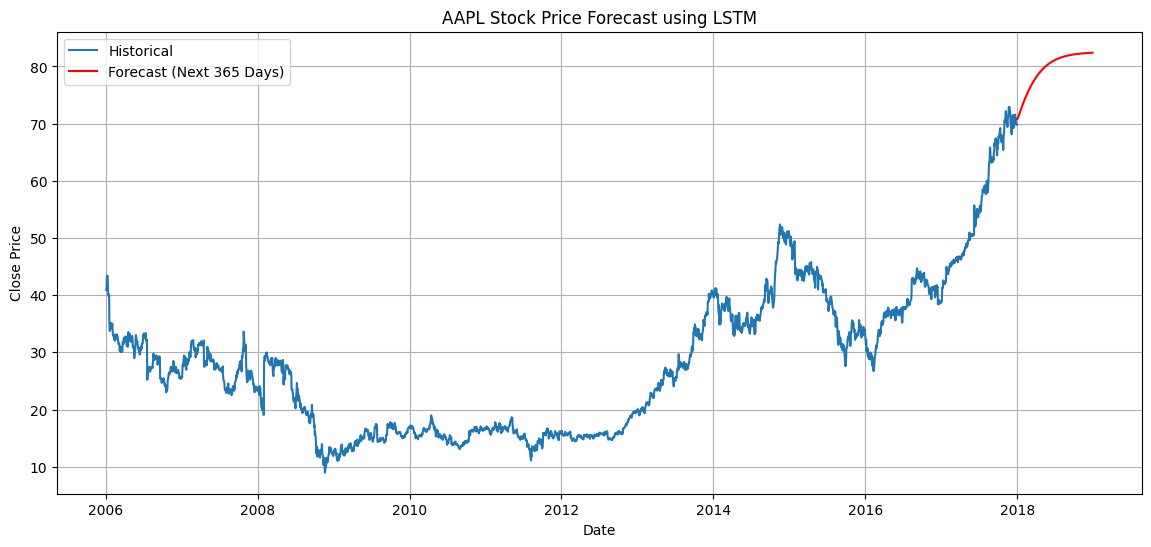

In [ ]:
# Inverse transform forecast
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365)

# Plot original + forecast
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Historical')
plt.plot(future_dates, forecast, label='Forecast (Next 365 Days)', color='red')
plt.title('AAPL Stock Price Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


# **Evaluate and compare model accuracy**

In [ ]:
data=pd.read_csv('/content/stock_data.csv')
data['Date']=pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date',inplace=True)
df=data[['Close']]


In [ ]:
split_size=int(len(df)*0.8)
train_set=df[:split_size]
test_set=df[split_size:]
test_set


,Close
Date,
2015-08-10,37.15
2015-08-11,36.03
2015-08-12,34.49
2015-08-13,35.93
2015-08-14,36.24
...,...
2017-12-22,71.58
2017-12-26,69.86
2017-12-27,70.06


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np # Import numpy for np.sqrt

# Prophet
from prophet import Prophet
# Reload and prepare data specifically for Prophet evaluation
data = pd.read_csv('/content/stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
df = data[['Date', 'Close']].rename(columns={'Date':'ds','Close':'y'})

# Split data
split_size=int(len(df)*0.8)
train_set_prophet=df[:split_size]
test_set_prophet=df[split_size:]

# model creation and fitting
model=Prophet()
model.fit(train_set_prophet)

# future prediction dates generation
forecast_dates = test_set_prophet['ds']
forecast = pd.DataFrame({'ds': forecast_dates})

# Prediction
forecast=model.predict(forecast)

# predicted_range

predicted_prophet = forecast.set_index('ds')['yhat']

# Actual_range
actual_prophet = test_set_prophet.set_index('ds')['y']

# Reindex predicted_prophet to match the actual_prophet index
predicted_prophet = predicted_prophet.reindex(actual_prophet.index)

actual_prophet,predicted_prophet


# Evaluation of prophet

mse = mean_squared_error(actual_prophet, predicted_prophet)
mae = mean_absolute_error(actual_prophet, predicted_prophet)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prophet, predicted_prophet)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx9k3zjv/fyru9mko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx9k3zjv/haqtljpr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88443', 'data', 'file=/tmp/tmpqx9k3zjv/fyru9mko.json', 'init=/tmp/tmpqx9k3zjv/haqtljpr.json', 'output', 'file=/tmp/tmpqx9k3zjv/prophet_modelldj2pic3/prophet_model-20250521093902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:39:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:39:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 12.15
MSE: 174.10
RMSE: 13.19
R² Score: -0.14


In [ ]:
# Prophet Tuning
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np # Import numpy for np.sqrt

# Prophet
from prophet import Prophet
# Reload and prepare data specifically for Prophet evaluation
data = pd.read_csv('/content/stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
df = data[['Date', 'Close']].rename(columns={'Date':'ds','Close':'y'})

# Split data
split_size=int(len(df)*0.8)
train_set_prophet=df[:split_size]
test_set_prophet=df[split_size:]
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05  # try tuning this
)
model.fit(train_set_prophet)

# future prediction dates generation
forecast_dates = test_set_prophet['ds']
forecast = pd.DataFrame({'ds': forecast_dates})

# Prediction
forecast=model.predict(forecast)

# predicted_range

predicted_prophet = forecast.set_index('ds')['yhat']

# Actual_range
actual_prophet = test_set_prophet.set_index('ds')['y']

# Reindex predicted_prophet to match the actual_prophet index
predicted_prophet = predicted_prophet.reindex(actual_prophet.index)

actual_prophet,predicted_prophet


# Evaluation of prophet

mse = mean_squared_error(actual_prophet, predicted_prophet)
mae = mean_absolute_error(actual_prophet, predicted_prophet)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prophet, predicted_prophet)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')



DEBUG:cmdstanpy:input tempfile: /tmp/tmphqfy2_bm/1ty0o3rp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqfy2_bm/zy1ky9ja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70753', 'data', 'file=/tmp/tmphqfy2_bm/1ty0o3rp.json', 'init=/tmp/tmphqfy2_bm/zy1ky9ja.json', 'output', 'file=/tmp/tmphqfy2_bm/prophet_model0___3bq0/prophet_model-20250526101345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 12.15
MSE: 174.10
RMSE: 13.19
R² Score: -0.14


ARIMA

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use closing price and split
data = pd.read_csv('/content/stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date', inplace=True)

series = data['Close']
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Build and fit ARIMA model
model_arima = ARIMA(train, order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Forecast
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Evaluate
mae_arima = mean_absolute_error(test, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
r2_arima = r2_score(test, forecast_arima)

print(f'ARIMA - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, R²: {r2_arima:.2f}')



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA - MAE: 10.36, RMSE: 14.71, R²: -0.42


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('/content/stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date', inplace=True)

series = data['Close']
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Model creation
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
sarima_result=model.fit()

# Forecast for length of test data
forecast=sarima_result.forecast(steps=len(test))

# Set forecast index = test index
forecast.index = test.index

# Evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)

print(f"SARIMA - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA - MAE: 9.21, RMSE: 13.25, R² Score: -0.15


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


LSTM

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense













In [ ]:
data=pd.read_csv("/content/stock_data.csv")
data=data.set_index('Date')

df=data[['Close']]
df


,Close
Date,
01-03-2006,40.91
01-04-2006,40.97
01-05-2006,41.53
01-06-2006,43.21
01-09-2006,43.42
...,...
12/22/2017,71.58
12/26/2017,69.86
12/27/2017,70.06


In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Build and Train LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))


In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0199 - val_loss: 0.0027
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1472e-04 - val_loss: 0.0011
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3429e-04 - val_loss: 8.1909e-04
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.6716e-04 - val_loss: 5.1708e-04
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1046e-04 - val_loss: 7.7883e-04
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9663e-04 - val_loss: 0.0013
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5193e-04 - val_loss: 6.8477e-04
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9807e-04 - val_loss: 8.4000e-04
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3438e-04 - val_loss: 6.6127e-04
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2513e-04 - val_loss: 5.8121e-04


In [ ]:
# Evaluation
# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MAE: 1.15
RMSE: 1.54
R² Score: 0.98
